## Brouillon Diane

In [2]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import statsmodels.api as sm

In [3]:
bnp = pd.read_excel('dataset_Prices/BNP_Prices.xlsx')

In [4]:
bnp.head()

,BNP FP Equity,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Dates,Open,Close,High,Low
1,2022-09-13 09:00:00.005000,50.8,50.84,50.91,50.75
2,2022-09-13 09:01:00,50.86,50.91,50.91,50.85
3,2022-09-13 09:02:00,50.87,50.87,50.9,50.84
4,2022-09-13 09:03:00,50.88,50.86,50.91,50.82


In [5]:
start_date = '2005-01-01'
end_date = '2023-12-31'

data_JPM = yf.download(tickers="JPM", start=start_date, end=end_date)

C:\Users\diane\AppData\Local\Temp\ipykernel_50668\1991613486.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_JPM = yf.download(tickers="JPM", start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


In [12]:
data_SP500 = yf.download(tickers="^GSPC", start=start_date, end=end_date)
print("data_SP500 shape : ", data_SP500.shape)
data_SP500.tail()


C:\Users\diane\AppData\Local\Temp\ipykernel_50668\2591821409.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_SP500 = yf.download(tickers="^GSPC", start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

data_SP500 shape :  (4781, 5)


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2023-12-22,4754.629883,4772.939941,4736.770020,4753.919922,3046770000
2023-12-26,4774.750000,4784.720215,4758.450195,4758.859863,2513910000
2023-12-27,4781.580078,4785.390137,4768.899902,4773.450195,2748450000
2023-12-28,4783.350098,4793.299805,4780.979980,4786.439941,2698860000
2023-12-29,4769.830078,4788.430176,4751.990234,4782.879883,3126060000


In [9]:
dates = np.array(data_SP500.index)
values = np.array(data_SP500['Close'])

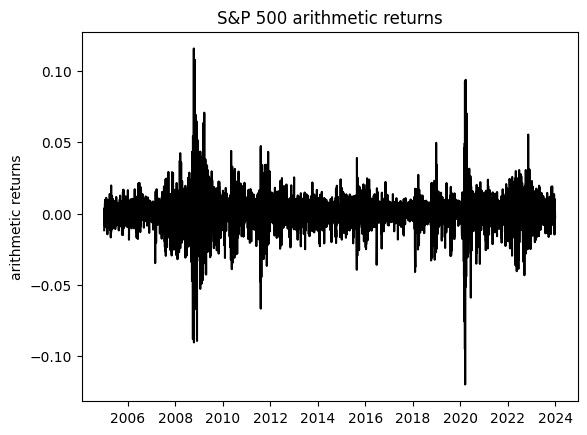

In [10]:
arithmetic_returns_aux = (values[1:] - values[0:-1]) / values[0:-1]
arithmetic_returns=arithmetic_returns_aux.flatten() #from a 2D array (n,1) in a 1D array
return_dates = dates[1:]

plt.plot(return_dates, arithmetic_returns, color='k')
plt.title("S&P 500 arithmetic returns")
plt.ylabel("arithmetic returns")
plt.show()

In [ ]:
r = arithmetic_returns - np.mean(arithmetic_returns)      # centrage

# choix du lag avec AIC
aic_vals = []
p_max = 10
for p in range(1, p_max+1):
    model = sm.tsa.ARIMA(r, order=(p,0,0)).fit()
    aic_vals.append(model.aic)

p_opt = np.argmin(aic_vals) + 1
print("p optimal =", p_opt)

# fit le modèle ar(p)
model_ar = sm.tsa.ARIMA(r, order=(p_opt,0,0)).fit()
print(model_ar.summary())

# prediction 1 step ahead
forecast = model_ar.forecast(steps=1)
print("Prévision AR(1-step) :", forecast[0])

c:\Users\diane\time-series-pred\tspenv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p optimal = 9
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4780
Model:                 ARIMA(9, 0, 0)   Log Likelihood               14319.477
Date:                Tue, 02 Dec 2025   AIC                         -28616.954
Time:                        18:06:04   BIC                         -28545.760
Sample:                             0   HQIC                        -28591.944
                               - 4780                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.965e-06      0.000     -0.018      0.986      -0.000       0.000
ar.L1         -0.1252      0.007    -16.974      0.000      -0.140      -0.111
ar.L2         -0.0201      0.006     -